In [4]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd 
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '5c1488e0-9af4-4df5-a25b-d32da445d48b',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-07-02T17:59:53.686Z', 'error_code': 0, 'error_message': None, 'elapsed': 24, 'credit_count': 1, 'notice': None, 'total_count': 10053}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11491, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [5]:
type(data)

dict

In [6]:
pd.set_option('display.max_columns', None)
df = pd.json_normalize(data['data'])

df['time_stamp'] = pd.to_datetime('now')
df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,time_stamp
0,1,Bitcoin,BTC,bitcoin,11491,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971931e+07,1.971931e+07,False,NaN,1,NaN,NaN,None,2024-07-02T17:58:00.000Z,62056.415428,2.187786e+10,-14.8135,0.326357,-2.407741,1.017513,-8.523236,0.243830,-6.007113,1.223709e+12,53.3936,1.303185e+12,None,2024-07-02T17:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 13:00:00.629588
1,1027,Ethereum,ETH,ethereum,9116,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201914e+08,1.201914e+08,True,NaN,2,NaN,NaN,None,2024-07-02T17:57:00.000Z,3419.367355,1.029823e+10,-15.2861,0.204103,-1.913733,0.912566,-9.360641,10.958184,2.724056,4.109786e+11,17.9353,4.109786e+11,None,2024-07-02T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 13:00:00.629588
2,825,Tether USDt,USDT,tether,90753,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.127873e+11,1.160769e+11,True,NaN,3,NaN,NaN,None,2024-07-02T17:57:00.000Z,0.998776,4.108413e+10,-11.7752,0.000475,-0.000195,-0.103009,-0.062613,-0.145472,-0.158723,1.126493e+11,4.9161,1.159348e+11,None,2024-07-02T17:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-02 13:00:00.629588
3,1839,BNB,BNB,bnb,2188,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475831e+08,1.475831e+08,False,NaN,4,NaN,NaN,None,2024-07-02T17:57:00.000Z,575.958972,1.512660e+09,-11.1125,0.262284,-0.923262,0.198042,-3.708115,-0.878404,3.761996,8.500180e+10,3.7095,8.500180e+10,None,2024-07-02T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 13:00:00.629588
4,5426,Solana,SOL,solana,697,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.627786e+08,5.793824e+08,True,NaN,5,NaN,NaN,None,2024-07-02T17:57:00.000Z,149.286707,1.727343e+09,-11.1659,0.407846,0.806858,8.563051,-8.168097,4.999838,-20.647638,6.908670e+10,3.0150,8.649409e+10,None,2024-07-02T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 13:00:00.629588
5,3408,USDC,USDC,usd-coin,20681,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.243619e+10,3.243619e+10,False,NaN,6,NaN,NaN,None,2024-07-02T17:57:00.000Z,1.000034,4.277194e+09,-9.4926,0.007671,0.012829,-0.008502,0.007746,0.001432,0.003553,3.243729e+10,1.4156,3.243729e+10,None,2024-07-02T17:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-02 13:00:00.629588
6,52,XRP,XRP,xrp,1346,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.568833e+10,9.998749e+10,False,NaN,7,NaN,NaN,None,2024-07-02T17:58:00.000Z,0.481728,8.632526e+08,6.3192,-0.058544,0.643694,1.044788,-6.076375,-8.704321,-16.942862,2.682662e+10,1.1707,4.817279e+10,None,2024-07-02T17:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 13:00:00.629588
7,11419,Toncoin,TON,toncoin,449,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.460080e+09,5.108427e+09,True,NaN,8,3.414167e+09,2.750241e+10,None,2024-07-02T17:57:00.000Z,8.055379,2.986960e+08,60.5966,0.371790,4.538386,7.776332,22.270572,43.963783,60.856679,1.981688e+10,0.8648,4.115031e+10,None,2024-07-02T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 13:00:00.629588
8,74,Dogecoin,DOGE,dogecoin,1017,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",N

In [18]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd 

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '5c1488e0-9af4-4df5-a25b-d32da445d48b',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
   
    df2 = pd.json_normalize(data['data'])
    df2['time_stamp'] = pd.to_datetime('now')
   
    # Concatenating dataframes. 
    df = pd.concat([df, df2], ignore_index=True)
    
    if not os.path.isfile(r'C:\python scripts\API.csv'):
        df.to_csv(r'C:\python scripts\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\python scripts\API.csv', mode= 'a', header=False)
   
    return df





In [19]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('api runner complete')
    sleep(60)
exit()
    

api runner complete
api runner complete
api runner complete
api runner complete
api runner complete
api runner complete
api runner complete
api runner complete
api runner complete
api runner complete
api runner complete


KeyboardInterrupt: 

In [23]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,time_stamp
0,1,Bitcoin,BTC,bitcoin,11491,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.971931e+07,1.971931e+07,False,NaN,1,NaN,NaN,None,2024-07-02T17:58:00.000Z,62056.415428,2.187786e+10,-14.8135,0.326357,-2.407741,1.017513,-8.523236,0.243830,-6.007113,1.223709e+12,53.3936,1.303185e+12,None,2024-07-02T17:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 13:00:00.629588
1,1027,Ethereum,ETH,ethereum,9116,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201914e+08,1.201914e+08,True,NaN,2,NaN,NaN,None,2024-07-02T17:57:00.000Z,3419.367355,1.029823e+10,-15.2861,0.204103,-1.913733,0.912566,-9.360641,10.958184,2.724056,4.109786e+11,17.9353,4.109786e+11,None,2024-07-02T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 13:00:00.629588
2,825,Tether USDt,USDT,tether,90753,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.127873e+11,1.160769e+11,True,NaN,3,NaN,NaN,None,2024-07-02T17:57:00.000Z,0.998776,4.108413e+10,-11.7752,0.000475,-0.000195,-0.103009,-0.062613,-0.145472,-0.158723,1.126493e+11,4.9161,1.159348e+11,None,2024-07-02T17:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-02 13:00:00.629588
3,1839,BNB,BNB,bnb,2188,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475831e+08,1.475831e+08,False,NaN,4,NaN,NaN,None,2024-07-02T17:57:00.000Z,575.958972,1.512660e+09,-11.1125,0.262284,-0.923262,0.198042,-3.708115,-0.878404,3.761996,8.500180e+10,3.7095,8.500180e+10,None,2024-07-02T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 13:00:00.629588
4,5426,Solana,SOL,solana,697,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.627786e+08,5.793824e+08,True,NaN,5,NaN,NaN,None,2024-07-02T17:57:00.000Z,149.286707,1.727343e+09,-11.1659,0.407846,0.806858,8.563051,-8.168097,4.999838,-20.647638,6.908670e+10,3.0150,8.649409e+10,None,2024-07-02T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 13:00:00.629588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,5805,Avalanche,AVAX,avalanche,750,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",715748719.0,3.941765e+08,4.435229e+08,False,NaN,11,NaN,NaN,None,2024-07-02T18:37:00.000Z,28.707157,2.627920e+08,-21.2355,1.237275,-3.482270,12.711914,-18.232956,-18.751704,-37.054020,1.131569e+10,0.4916,2.054711e+10,None,2024-07-02T18:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 13:39:14.783942
311,1958,TRON,TRX,tron,998,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.718616e+10,8.718621e+10,True,NaN,12,7.165966e+10,9.208916e+09,None,2024-07-02T18:37:00.000Z,0.128509,2.327665e+08,-12.6786,-0.143272,0.286138,5.725916,12.296871,4.193345,9.876351,1.120421e+10,0.4867,1.120422e+10,None,2024-07-02T18:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 13:39:14.783942
312,5994,Shiba Inu,SHIB,shiba-inu,841,2020-08-01T00:00:00.000Z,"[memes, ethereum-ecosystem, doggone-doggerel]",NaN,5.892709e+14,5.895194e+14,False,NaN,13,NaN,NaN,None,2024-07-02T18:37:00.000Z,0.000017,1.570055e+08,-24.5226,1.120512,-0.210561,-4.906245,-29.411809,-28.550281,-34.360326,1.011958e+10,0.4396,1.012385e+10,None,2024-07-02T18:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0x

In [27]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,time_stamp
0,1,Bitcoin,BTC,bitcoin,11491,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19719306.00000,19719306.00000,False,NaN,1,NaN,NaN,None,2024-07-02T17:58:00.000Z,62056.41543,21877856978.13653,-14.81350,0.32636,-2.40774,1.01751,-8.52324,0.24383,-6.00711,1223709445080.28662,53.39360,1303184723979.93994,None,2024-07-02T17:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 13:00:00.629588
1,1027,Ethereum,ETH,ethereum,9116,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120191423.45771,120191423.45771,True,NaN,2,NaN,NaN,None,2024-07-02T17:57:00.000Z,3419.36736,10298231674.79308,-15.28610,0.20410,-1.91373,0.91257,-9.36064,10.95818,2.72406,410978629767.65973,17.93530,410978629767.65997,None,2024-07-02T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 13:00:00.629588
2,825,Tether USDt,USDT,tether,90753,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112787335849.36160,116076856617.66272,True,NaN,3,NaN,NaN,None,2024-07-02T17:57:00.000Z,0.99878,41084127614.55631,-11.77520,0.00047,-0.00019,-0.10301,-0.06261,-0.14547,-0.15872,112649320725.79187,4.91610,115934816187.42000,None,2024-07-02T17:57:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-02 13:00:00.629588
3,1839,BNB,BNB,bnb,2188,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147583077.38025,147583077.38025,False,NaN,4,NaN,NaN,None,2024-07-02T17:57:00.000Z,575.95897,1512659908.59951,-11.11250,0.26228,-0.92326,0.19804,-3.70811,-0.87840,3.76200,85001797486.20146,3.70950,85001797486.20000,None,2024-07-02T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 13:00:00.629588
4,5426,Solana,SOL,solana,697,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,462778636.72021,579382365.59316,True,NaN,5,NaN,NaN,None,2024-07-02T17:57:00.000Z,149.28671,1727343447.62203,-11.16590,0.40785,0.80686,8.56305,-8.16810,4.99984,-20.64764,69086698927.96822,3.01500,86494085681.20000,None,2024-07-02T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 13:00:00.629588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,5805,Avalanche,AVAX,avalanche,750,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",715748719.00000,394176547.92083,443522917.92083,False,NaN,11,NaN,NaN,None,2024-07-02T18:37:00.000Z,28.70716,262792021.61754,-21.23550,1.23728,-3.48227,12.71191,-18.23296,-18.75170,-37.05402,11315687856.08497,0.49160,20547110502.43000,None,2024-07-02T18:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 13:39:14.783942
311,1958,TRON,TRX,tron,998,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,87186161636.75227,87186206491.85246,True,NaN,12,71659659264.00000,9208915552.36922,None,2024-07-02T18:37:00.000Z,0.12851,232766528.49799,-12.67860,-0.14327,0.28614,5.72592,12.29687,4.19335,9.87635,11204211799.14005,0.48670,11204217563.43000,None,2024-07-02T18:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 13:39:14.783942
312,5994,Shiba Inu,SHIB,shiba-inu,841,2020-08-01T00:00:00.000Z,"[memes, ethereum-ecosystem, doggone-doggerel]",NaN,589270901748116.62500,589519357950127.75000,False,NaN,13,NaN,NaN,None,2024-07-02T18:37:00.000Z,0.00002,157005503.60415,-2

In [54]:
# Group by 'name' and then aggregate the relevant columns using an aggregation function, such as mean
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()

df3


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.50009,-2.13544,0.82740,-8.03629,0.57465,-5.44199
Ethereum,0.39545,-1.58437,0.71660,-9.02908,11.30668,3.71235
Tether USDt,0.00108,-0.01898,-0.10054,-0.07567,-0.16265,-0.16871
BNB,0.51866,-0.56596,0.32995,-3.28788,-0.43110,4.57472
Solana,2.11062,2.65147,9.99885,-6.69163,6.65656,-18.52444
USDC,-0.00193,-0.00158,-0.01006,-0.01178,-0.01248,-0.00717
XRP,0.26618,0.95677,1.16651,-5.69821,-8.53053,-16.24798
Toncoin,0.22804,4.28235,7.58932,22.80652,41.42014,61.96544
Dogecoin,1.01301,-1.10582,-2.30617,-20.26771,-11.53759,-29.36157


In [58]:
df4 = df3.stack()
df4

name                                   
Bitcoin    quote.USD.percent_change_1h      0.50009
           quote.USD.percent_change_24h    -2.13544
           quote.USD.percent_change_7d      0.82740
           quote.USD.percent_change_30d    -8.03629
           quote.USD.percent_change_60d     0.57465
                                             ...   
Chainlink  quote.USD.percent_change_24h     0.18744
           quote.USD.percent_change_7d      2.78910
           quote.USD.percent_change_30d   -20.50384
           quote.USD.percent_change_60d     3.95570
           quote.USD.percent_change_90d   -18.02720
Length: 90, dtype: float64

In [62]:
pd.set_option('display.max_rows', 500)
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.50009
            quote.USD.percent_change_24h  -2.13544
            quote.USD.percent_change_7d    0.82740
            quote.USD.percent_change_30d  -8.03629
            quote.USD.percent_change_60d   0.57465
            quote.USD.percent_change_90d  -5.44199
Ethereum    quote.USD.percent_change_1h    0.39545
            quote.USD.percent_change_24h  -1.58437
            quote.USD.percent_change_7d    0.71660
            quote.USD.percent_change_30d  -9.02908
            quote.USD.percent_change_60d  11.30668
            quote.USD.percent_change_90d   3.71235
Tether USDt quote.USD.percent_change_1h    0.00108
            quote.USD.percent_change_24h  -0.01898
            quote.USD.percent_change_7d   -0.10054
            quote.USD.percent_change_30d  -0.07567
            quote.USD.percent_change_60d  -0.16265
            quote.USD.percent_change_90d  -0.16871
BNB         quote.USD.percent_change_1h    0.51866
            quote.USD.percent_change_24h  -0.56596
            quote.USD.percent_change_7d    0.32995
            quote.USD.percent_change_30d  -3.28788
            quote.USD.percent_change_60d  -0.43110
            quote.USD.percent_change_90d   4.57472
Solana      quote.USD.percent_change_1h    2.11062
            quote.USD.percent_change_24h   2.65147
            quote.USD.percent_change_7d    9.99885
            quote.USD.percent_change_30d  -6.69163
            quote.USD.percent_change_60d   6.65656
            quote.USD.percent_change_90d -18.52444
USDC        quote.USD.percent_change_1h   -0.00193
            quote.USD.percent_change_24h  -0.00158
            quote.USD.percent_change_7d   -0.01006
            quote.USD.percent_change_30d  -0.01178
            quote.USD.percent_change_60d  -0.01248
            quote.USD.percent_change_90d  -0.00717
XRP         quote.USD.percent_change_1h    0.26618
            quote.USD.percent_change_24h   0.95677
            quote.USD.percent_change_7d    1.16651
            quote.USD.percent_change_30d  -5.69821
            quote.USD.percent_change_60d  -8.53053
            quote.USD.percent_change_90d -16.24798
Toncoin     quote.USD.percent_change_1h    0.22804
            quote.USD.percent_change_24h   4.28235
            quote.USD.percent_change_7d    7.58932
            quote.USD.percent_change_30d  22.80652
            quote.USD.percent_change_60d  41.42014
            quote.USD.percent_change_90d  61.96544
Dogecoin    quote.USD.percent_change_1h    1.01301
            quote.USD.percent_change_24h  -1.10582
            quote.USD.percent_change_7d   -2.30617
            quote.USD.percent_change_30d -20.26771
            quote.USD.percent_change_60d -11.53759
            quote.USD.percent_change_90d -29.36157
Cardano     quote.USD.percent_change_1h    0.71232
            quote.USD.percent_change_24h   2.17058
            quote.USD.percent_change_7d    5.06261
            quote.USD.percent_change_30d  -6.50720
            quote.USD.percent_change_60d -10.99573
            quote.USD.percent_change_90d -28.08485
TRON        quote.USD.percent_change_1h   -0.05708
            quote.USD.percent_change_24h   0.16818
            quote.USD.percent_change_7d    5.86733
            quote.USD.percent_change_30d  12.48072
            quote.USD.percent_change_60d   4.15188
            quote.USD.percent_change_90d   9.89824
Avalanche   quote.USD.percent_change_1h    1.27190
            quote.USD.percent_change_24h  -3.98789
            quote.USD.percent_change_7d   12.76388
            quote.USD.percent_change_30d -18.44050
            quote.USD.percent_change_60d -19.05758
            quote.USD.percent_change_90d -37.28117
Shiba Inu   quote.USD.percent_change_1h    0.91038
            quote.USD.percent_change_24h  -0.66319
            quote.USD.percent_change_7d   -4.58067
            quote.USD.percent_change_30d -29.44088
            quote.USD.percent_change_60d -28.71271
            quo

In [66]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.50009
1,Bitcoin,quote.USD.percent_change_24h,-2.13544
2,Bitcoin,quote.USD.percent_change_7d,0.82740
3,Bitcoin,quote.USD.percent_change_30d,-8.03629
4,Bitcoin,quote.USD.percent_change_60d,0.57465
5,Bitcoin,quote.USD.percent_change_90d,-5.44199
6,Ethereum,quote.USD.percent_change_1h,0.39545
7,Ethereum,quote.USD.percent_change_24h,-1.58437
8,Ethereum,quote.USD.percent_change_7d,0.71660
9,Ethereum,quote.USD.percent_change_30d,-9.02908


In [71]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.50009
1,Bitcoin,quote.USD.percent_change_24h,-2.13544
2,Bitcoin,quote.USD.percent_change_7d,0.82740
3,Bitcoin,quote.USD.percent_change_30d,-8.03629
4,Bitcoin,quote.USD.percent_change_60d,0.57465
5,Bitcoin,quote.USD.percent_change_90d,-5.44199
6,Ethereum,quote.USD.percent_change_1h,0.39545
7,Ethereum,quote.USD.percent_change_24h,-1.58437
8,Ethereum,quote.USD.percent_change_7d,0.71660
9,Ethereum,quote.USD.percent_change_30d,-9.02908


In [76]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1hr','24hr','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1hr,0.50009
1,Bitcoin,24hr,-2.13544
2,Bitcoin,7d,0.82740
3,Bitcoin,30d,-8.03629
4,Bitcoin,60d,0.57465
5,Bitcoin,90d,-5.44199
6,Ethereum,1hr,0.39545
7,Ethereum,24hr,-1.58437
8,Ethereum,7d,0.71660
9,Ethereum,30d,-9.02908


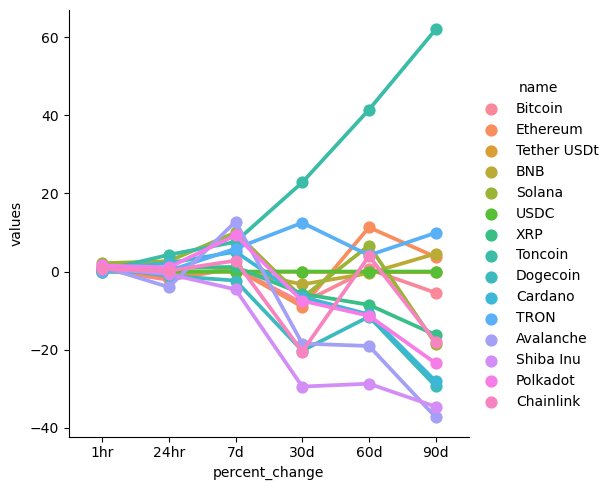

In [77]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.catplot(x='percent_change', y='values', hue ='name', data = df7, kind='point')

In [16]:
df72 = pd.read_csv(r'C:\python scripts\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,time_stamp
0,0,1,Bitcoin,BTC,bitcoin,11491,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.971931e+07,1.971931e+07,False,NaN,1,NaN,NaN,NaN,2024-07-02T17:58:00.000Z,62056.415428,2.187786e+10,-14.8135,0.326357,-2.407741,1.017513,-8.523236,0.243830,-6.007113,1.223709e+12,53.3936,1.303185e+12,NaN,2024-07-02T17:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 13:00:00.629588
1,1,1027,Ethereum,ETH,ethereum,9116,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201914e+08,1.201914e+08,True,NaN,2,NaN,NaN,NaN,2024-07-02T17:57:00.000Z,3419.367355,1.029823e+10,-15.2861,0.204103,-1.913733,0.912566,-9.360641,10.958184,2.724056,4.109786e+11,17.9353,4.109786e+11,NaN,2024-07-02T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 13:00:00.629588
2,2,825,Tether USDt,USDT,tether,90753,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.127873e+11,1.160769e+11,True,NaN,3,NaN,NaN,NaN,2024-07-02T17:57:00.000Z,0.998776,4.108413e+10,-11.7752,0.000475,-0.000195,-0.103009,-0.062613,-0.145472,-0.158723,1.126493e+11,4.9161,1.159348e+11,NaN,2024-07-02T17:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-02 13:00:00.629588
3,3,1839,BNB,BNB,bnb,2188,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475831e+08,1.475831e+08,False,NaN,4,NaN,NaN,NaN,2024-07-02T17:57:00.000Z,575.958972,1.512660e+09,-11.1125,0.262284,-0.923262,0.198042,-3.708115,-0.878404,3.761996,8.500180e+10,3.7095,8.500180e+10,NaN,2024-07-02T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 13:00:00.629588
4,4,5426,Solana,SOL,solana,697,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.627786e+08,5.793824e+08,True,NaN,5,NaN,NaN,NaN,2024-07-02T17:57:00.000Z,149.286707,1.727343e+09,-11.1659,0.407846,0.806858,8.563051,-8.168097,4.999838,-20.647638,6.908670e+10,3.0150,8.649409e+10,NaN,2024-07-02T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 13:00:00.629588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,100,5805,Avalanche,AVAX,avalanche,750,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",715748719.0,3.941765e+08,4.435228e+08,False,NaN,11,NaN,NaN,NaN,2024-07-02T18:15:00.000Z,28.582941,2.628748e+08,-20.1905,1.344847,-4.144948,12.959901,-18.498984,-19.318141,-37.286031,1.126672e+10,0.4900,2.045820e+10,NaN,2024-07-02T18:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 13:18:04.268289
101,101,1958,TRON,TRX,tron,998,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,8.718630e+10,8.718634e+10,True,NaN,12,7.165966e+10,9.220387e+09,NaN,2024-07-02T18:15:00.000Z,0.128669,2.342073e+08,-11.1636,0.060777,0.160903,6.057272,12.668601,4.165797,9.950240,1.121819e+10,0.4879,1.121819e+10,NaN,2024-07-02T18:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 13:18:04.268289
102,102,5994,Shiba Inu,SHIB,shiba-inu,841,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,5.892709e+14,5.895194e+14,False,NaN,13,NaN,NaN,NaN,2024-07-02T18:15:00.000Z,0.000017,1.560052e+08,-24.6801,0.694909,-0.948115,-4.176717,-29.572295,-29.006384,-34.732207,1.007256e+10,0.4381,1.007681e+10,NaN,2024-07-02T18:15:00.000Z,1027.0,